# Resumir y visualizar datos

Las dos formas más comunes spara resumir la distribución de una feature de un conjunto de datos son:

- **Medidas de tendencia central:** Medidas que identifican puntos correspondientes a la región central de los datos. Por ejemplo, el promedio / media (el valor esperado), la mediana (el punto que tiene 50% de los datos antes y 50% de los datos después de él).
- **Medidas de dispersión**: Medidas que modelan el grado de disperisón de la distribución conrespecto a la región central de los datos. Por ejemplo: la desviación absoluta promedio (distancia absoluta promedio con respecto a la media), la varianza (promedio de las distancias al cuadrado de los datos hacia la media), el rango intercuartil (el ancho del rango **central** de valores que contiene el 50% de los datos), etc.

Estas medidas son estadísticas de resumen univariadas porque se basan solo en una feature o dimensión. Hay varias estadísticas de resumen multivariadas como la covarianza y la correlación que dan una idea de cómo se relacionan múltiples features.

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.stats import iqr, spearmanr, kendalltau, rankdata
import pandas as pd
sns.set()

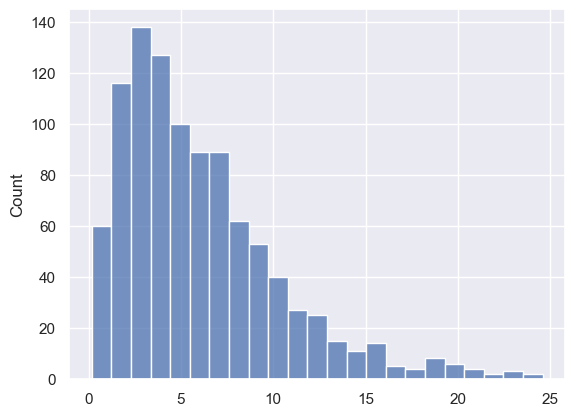

In [2]:
datos = np.random.gamma(2,3,1000)
sns.histplot(datos)
plt.show()

In [3]:
promedio = np.mean(datos)
mediana = np.median(datos)
varianza = np.var(datos)
desv_estandar = np.std(datos)
print(f"Promedio:   {promedio:.3f}\nMediana:    {mediana:.3f}\nVarianza:  {varianza:.3f}\nDesv. Est.: {desv_estandar:.3f}")

Promedio:   6.050
Mediana:    4.986
Varianza:  18.754
Desv. Est.: 4.331


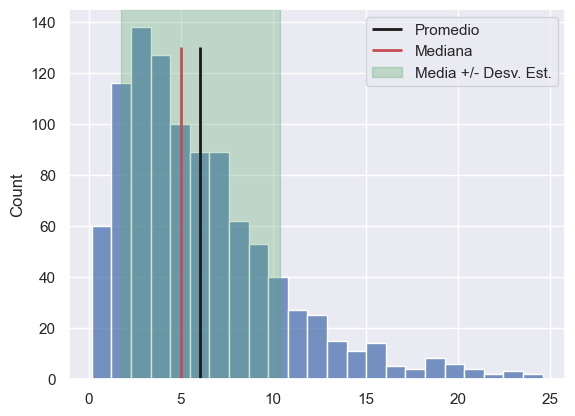

In [4]:
ax = sns.histplot(datos)
ax.vlines(promedio,ymin=0,ymax=130, colors="k", label="Promedio", lw=2)
ax.vlines(mediana,ymin=0,ymax=130, colors="r", label="Mediana", lw=2)
plt.axvspan(
    promedio - desv_estandar, promedio + desv_estandar,
    alpha=0.3, color='g', label="Media +/- Desv. Est."
)
plt.legend()
plt.show()

## Resumen de datos univariados

### Medidas de tendencia central

In [5]:
x = np.random.randint(1,11,100)
x_outliers = np.array(list(x)+[200])

#### Media muestral

Dada una muestra de $n$ valores $x_1, x_2,\dots,x_n$, la media muestral $\hat{\mu}_X$ o $\bar{x}$ se define:

$$
\hat{\mu}_X = \frac{\sum_{i=1}^nx_i}{n}
$$

Si se tiene una muestra multivariada $\vec{x}_1, \vec{x}_2,\dots,\vec{x}_n$, entonces:

$$
\hat{\mu}_X = \frac{\sum_{i=1}^n\vec{x}_i}{n}
$$

Esta medida de tendencia central es muy sensible a los valores atípicos, ya que incluso un solo valor atípico puede cambiar la media significativamente.

In [6]:
media = np.mean(x)
print(f"Media muestral: {media:.4f}")

media_outliers = np.mean(x_outliers)
print(f"Media muestral outliers: {media_outliers:.4f}")

Media muestral: 6.0100
Media muestral outliers: 7.9307


#### Mediana muestral

Dada una muestra de $n$ valores $x_1, x_2,\dots,x_n$, la mediana muestral es definida ordenando todos los valores de menor a mayor y reportando el valor del punto central. En caso de que $n$ sea par, cualquier valor entre los valores $n/2$ y $n/2 + 1$ suele tomarse la mediana muestral como el promedio de estos dos valores.


In [7]:
mediana = np.median(x)
print(f"Mediana muestral: {mediana:.4f}")

mediana_outliers = np.median(x_outliers)
print(f"Mediana muestral outliers: {mediana_outliers:.4f}")

Mediana muestral: 6.0000
Mediana muestral outliers: 6.0000


**Ejercicio 1**

Considera un gran conjunto de datos que contiene valores repetidos, que salen del conjunto $A=\{ 1,2,\dots, 9 \}$. Supongamos que la frecuencia para cada entero $i$ en ese conjunto es exactamente proporcional a $1/i$, con $i\in A$. Calcula la media y mediana muestrales.

In [8]:
frec = np.array([1/i for i in range(1,10)])
frec_normalizada = frec/np.sum(frec)
numeros = np.arange(1,10)

media = np.sum(frec_normalizada * numeros)

mediana = None
for i in range(9):
    if 0.5 < np.sum(frec_normalizada[:i+1]):
        mediana = i+1
        break

print(f"Media muestral: {media:.3f}")
print(f"Mediana muestral: {mediana:.3f}")

Media muestral: 3.181
Mediana muestral: 2.000


**Ejercicio 2**

Calcula la media y mediana muestrales de los valores

$$
2,2,2,3,3,3,100
$$

Reflexiona en la diferencia entre los valores calculados. Qué medida es más representativa de la tendencia central?

In [9]:
x = np.array([2,2,2,3,3,3,100])
media = np.mean(x)
mediana = np.median(x)

print(f"Media muestral: {media:.3f}")
print(f"Mediana muestral: {mediana:.3f}")

Media muestral: 16.429
Mediana muestral: 3.000


La mediana muestral representa mejor la tendencia central de los datos, puesto que el valor $100$ sesga mucho el valor de la media muestral.

##### Percentiles muestrales

Dada una muestra de $n$ valores $x_1,x_2,\dots,x_n$, el $p-ésimo$ percentil (o $f=p/100$ percentil fraccional) de los valores es definido al ordenar los puntos de forma ascendente y reportando el valor del $k=(n\cdot f+1-f)-ésimo$ valor en este orden. En el caso de que el valor calculado de $k$ sea fraccionario, se realizará una interpolación ponderada de los dos valores inmediatos alrededor al rango calculado $k$. 

In [20]:
def rango_percentil(n, p):
    f = p/100
    return n * f + 1 - f

n = 4
p = 100/3
rango = rango_percentil(n, p)
# p/100 * (n-1) + 1
print(rango)

datos = [1,4,5,7]
print(datos[int(rango - 1)])

2.0
4


In [21]:
n = 5
p = 100/3
rango = rango_percentil(n, p)
# p/100 * (n-1) + 1
rango # 7/3 = 2 + 1/3

2.3333333333333335

In [19]:
# Interpolar percentil
datos[2 - 1] * 2/3 + datos[3 - 1] * 1/3

4.333333333333333

In [26]:
datos = [1,4,5,7]
rango = rango_percentil(4, 40)
print(rango)
peso = 1 - (rango - int(rango))
print(peso)
rango_python = int(rango) - 1
print(rango_python)
print(datos[rango_python] * peso + datos[rango_python + 1] * (1 - peso))

2.2
0.7999999999999998
1
4.2


In [27]:
datos = [1,4,5,7,9]
rango = rango_percentil(5, 40)
print(rango)
peso = 1 - (rango - int(rango))
print(peso)
rango_python = int(rango) - 1
print(rango_python)
print(datos[rango_python] * peso + datos[rango_python + 1] * (1 - peso))

2.6
0.3999999999999999
1
4.6


#### Moda muestral

Para variables discretas o categóricas, la moda muestral se define como el valor con la mayor frecuencia.

Para variables numéricas continuas, primero se definen "bins" en todo el rango numérico y después se reporta como "moda muestral" el punto medio del "bin" con la mayor frecuencia. En caso de que se conozca la distribución de probabilidad "verdadera" de donde provienen los datos, la moda de una distribución continua puede definirse exactamente como el máximo global de la función de densidad de probabilidad.

In [33]:
datos = pd.DataFrame(data={
    "num":[1,2,2,3,4,4,5,9,9]
})

print(datos.groupby("num").size())

print("Modas: 2, 4, 9")

# El conjunto de datos es multimodal


num
1    1
2    2
3    1
4    2
5    1
9    2
dtype: int64
Modas: 2, 4, 9


In [35]:
datos = pd.DataFrame(data={
    "num":[1,2,3,3,3,3,4,4,5,6,6,6,6,7,7,8]
})

print(datos.groupby("num").size())

print("Modas: 3, 6")

# El conjunto de datos es multimodal

num
1    1
2    1
3    4
4    2
5    1
6    4
7    2
8    1
dtype: int64
Modas: 3, 6


### Medidas de dispersión

Las medidas de dispersión miden el nivel de dispersión en una distribución de datos.

In [38]:
datos = np.random.standard_normal(100)

#### Rango Intercuartil muestral

El rango intercuartil es una medida no negativa definida por la diferencia entre los percentiles 75% y  25%. Este valor es la longitud del intervalo que contiene el 50% central de los datos.

Esta medida no es sensible a outliers, pero tampoco refleja la dispersión que puede haber entrel el primer o último 25% de los datos y el 50% central de estos. Esta es su mayor debilidad o desventaja como medida de dispersión.

In [39]:
iqr(datos)

1.1084845972327533

#### Desviación absoluta promedio (MAD) muestral

La Mean Absolute Deviation (MAD) para una muestra $x_1,\dots,x_n$ se define como el promedio de las distancias absolutas de los puntoas a la media muestral:

$$
\hat{MAD}_X=\frac{\sum_{i=1}^n|x_i-\hat{\mu}_X|}{n}
$$

Se debe notar que, en la práctica, esta medida generalmente es una subestimación de la desviación real de los puntos de datos a la *media poblacional*, especialmente cuando $n$ es pequeña.

In [44]:
MAD = lambda datos: np.sum(np.abs(datos - np.mean(datos)))/datos.shape[0]
MAD(datos)

0.6538583371816143

#### Varianza muestral con **media poblacional**

Dada una muestra $x_1,\dots,x_n$, la varianza se define como el promedio de las distancias al cuadrado de los puntos a la media poblacional:

$$
\hat{\sigma^2}_X=\frac{\sum_{i=1}^n(x_i-\mu_X^2)}{n}
$$

In [42]:
np.var(datos)

0.6589760069007466

#### Varianza muestral

Dada una muestra $x_1,\dots,x_n$, la varianza se define como el promedio de las distancias al cuadrado de los puntos a la media muestral con la **corrección de Bessel** (dividir entre $n-1$ en vez de entre $n$):

$$
\hat{\sigma^2}_X=\frac{\sum_{i=1}^n(x_i-\hat{\mu}_X^2)}{n-1}
$$

In [41]:
np.var(datos, ddof=1)

0.6656323302027745

#### Desviación estándar muestral

Dada una muestra $x_1,\dots,x_n$, la desviación estándar muestral se define como la raíz cuadrada de la varianza muestral:

$$
\hat{\sigma^2}_X=\sqrt{\frac{\sum_{i=1}^n(x_i-\hat{\mu}_X^2)}{n-1}}
$$

Esta medida suele usarse para interpretar la dispersión indicada por la varianza en las mismas unidades que los datos que se quieren analizar. 

In [43]:
np.std(datos, ddof=1)

0.8158629359167963

#### Ejercicios

Encuentra el MAD y desviación estándar (STD) de 1,1,1,3,3,3. No uses la corrección de Bessel. Repite el ejercicio para 1,3,3,3,3,3.

In [46]:
datos = np.array([1,1,1,3,3,3])
print(f"MAD: {MAD(datos):.3f}")
print(f"STD: {np.std(datos):.3f}")

MAD: 1.000
STD: 1.000


In [47]:
datos = np.array([1,3,3,3,3,3])
print(f"MAD: {MAD(datos):.3f}")
print(f"STD: {np.std(datos):.3f}")

MAD: 0.556
STD: 0.745


Encuentra la desviación estándar de los puntos 0, 3, 3.

In [49]:
datos = [0,3,3]
print(f"STD:          {np.std(datos):.3f}")
print(f"STD (Bessel): {np.std(datos, ddof=1):.3f}")

STD:          1.414
STD (Bessel): 1.732


## Resumen de datos multivariados

Al usar los estadísticos multivariados se quieren encontrar las relaciones entre las diferentes features, ya que encontrar estas relaciones es un paso crucial en machine learning.

In [268]:
y = np.linspace(0,1,100) - 0.1 + 0.2 * np.random.rand(100)
datos = pd.DataFrame(data={
    "X1": np.round(np.linspace(0,1,100) + 0.1 * np.random.rand(100),3),
    "X2": np.round(np.linspace(0.5,0,100) + 0.2 * np.random.rand(100),3),
    "X3": np.round(np.cbrt((y-0.5)/3) + 0.5 + 0.15 * np.random.rand(100),3),
    "X4": np.round(np.random.rand(100),3),
    "Y":  np.round(y,3)
})
print(np.min(np.round(np.cbrt(y/3) + 0.5,3)))
datos.head()

0.227


,X1,X2,X3,X4,Y
0,0.092,0.668,0.069,0.900,0.090
1,0.036,0.535,-0.002,0.216,0.068
2,0.075,0.506,-0.065,0.743,-0.061
3,0.083,0.598,0.070,0.252,0.031
4,0.107,0.673,0.055,0.581,-0.027


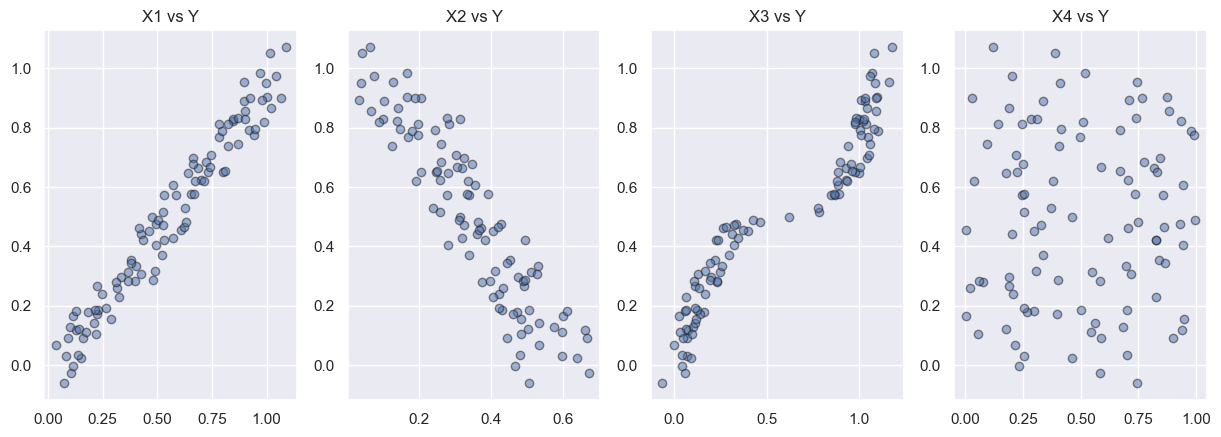

In [269]:
# Graficar datos
fig, axs = plt.subplots(
    nrows=1, ncols=datos.shape[1]-1
)
fig.set_figwidth(15)

for i, variable in enumerate([f"X{i}" for i in range(1,datos.shape[1])]):
    axs[i].plot(
        datos[variable], datos["Y"], "o", lw=0, mec="k",
        alpha=0.5
    )
    axs[i].set_title(f"{variable} vs Y")

plt.show()

### Covarianza

Dadas dos muestras emparejadas (pares) $x_1,\dots,x_n$ y $y_1,\dots,y_n$ de datos (donde $x_i$ está emparejado con $y_i$), la covarianza se define como el promedio de los productos de las desviaciones de los valores a sus medias correspondientes (de cada feature):

$$
\hat{\sigma}_{XY} = \frac{\sum_{i=1}^n\left[\:(x_i-\hat{\mu}_X)\cdot(y_i-\hat{\mu}_Y)\:\right]}{n-1}
$$

Como en el caso de la varianza, $n-1$ se usa como un mecanismo de corrección por usar las medias muestrales.

En caso de que $n$ "sea grande" y que se use la fórmula sin la corrección de $n-1$, se cumple la siguiente relación:

$$
\hat{\sigma}_{XY} = \frac{\sum_{i=1}^n\left[\:(x_i-\hat{\mu}_X)\cdot(y_i-\hat{\mu}_Y)\:\right]}{n} = \frac{\sum_{i=1}^nx_iy_i}{n}-\hat{\mu}_X\hat{\mu}_Y
$$

Lo cual permite interpretar intuitivamente a la covarianza como la diferencia entre el promedio de productos ($x_iy_i$) y el producto de las medias.

#### Interpretación

La covarianza es una medida de la asociación entre variables. Una covarianza positiva indica que las variables tienen una relación "positiva", mientras que una covarianza negativa indica que las variables tienen una relación "negativa".

- **Relación "positiva":** En general, si la variable $X$ aumenta su valor, entonces la variable $Y$ también aumenta su valor. Por ejemplo, típicamente si la edad de una persona aumenta, entonces su estatura también.

- **Relación "negativa":** En general, si la variable $X$ aumenta su valor, entonces la variable $Y$ disminuye su valor. Por ejemplo, típicamente si la cantidad de cigarros que una persona consume al día aumenta, entonces su esperanza de vida dismunye.

El tema con la covarianza es que es muy sensible a la escala de las variables con las que se trabaje, además de que no indica qué tan fuerte es la relación entre las variables.

In [270]:
# Cov X1 y Y
for variable in [f"X{i}" for i in range(1,datos.shape[1])]:
    pearson = np.cov(datos[variable], datos["Y"], rowvar=False)[0][1]
    print(f"Covarianza {variable},Y: {pearson:.4f}")


Covarianza X1,Y: 0.0856
Covarianza X2,Y: -0.0432
Covarianza X3,Y: 0.1190
Covarianza X4,Y: 0.0026


### Correlación de Pearson

Dadas dos muestras emparejadas (pares) $x_1,\dots,x_n$ y $y_1,\dots,y_n$ de datos (donde $x_i$ está emparejado con $y_i$), el coeficiente de correlación de Pearson $\rho_{XY}$ entre estas muestras es definido como una función de su covarianza muestral y sus desviaciones estándar muestrales:

$$
\rho_{XY} = \frac{\hat{\sigma}_{XY}}{\hat{\sigma}_X\hat{\sigma}_Y}
$$

Al dividir por el producto de las desviaciones estándar muestrales se obtiene una métrica adimensional (sin unidades). El coeficiente de correlación de Pearson $\rho_{XY}\in [-1,1]$.

Otra interpretación del coeficiente de correlación de Pearson es definiendo los vectores $\vec{x}_c,\vec{y}_c\in \mathbb{R}^n$ con valores para cada entrada las muestras menos su media muestral ($x_1-\hat{\mu}_X,\dots,x_n-\hat{\mu}_X$ y $y_1-\hat{\mu}_Y,\dots,y_n-\hat{\mu}_Y$, respectivamente), y luego calculando el coseno del ángulo entre estos vectores.

Si el valor de $\rho_{XY}$ es positivo y cerca de 1, indica una correlación positiva fuerte, mientras que un valor negativo y cerca de -1 indica una correlación negativa fuerte. Cuando el valor de $\rho_{XY}$ es cercano a 0, esto implica que no hay una relación fuerte entre las dos variables y que tienden a **variar independientemente de la otra**.

> El coeficiente de correlación de Pearson indica qué tan fuerte es la **correlación lineal** entre las dos variables.

In [271]:
for variable in [f"X{i}" for i in range(1,datos.shape[1])]:
    pearson = np.corrcoef(datos[variable], datos["Y"])[0][1]
    print(f"Corr. Pearson {variable},Y: {pearson:.4f}")

Corr. Pearson X1,Y: 0.9768
Corr. Pearson X2,Y: -0.9139
Corr. Pearson X3,Y: 0.9498
Corr. Pearson X4,Y: 0.0303


### Medidas de correlación basadas en Rangos (Ranks)

Estas medidas pueden utilizarse cuando no se tengan los valores numéricos pero sí sus rangos, como con variables ordinales. Estas medidas generalemente tienden a ser más estables y resistentes a outliers.

#### Correlación de Spearman

Dadas dos muestras emparejadas (pares) $x_1,\dots,x_n$ y $y_1,\dots,y_n$ de datos (donde $x_i$ está emparejado con $y_i$). Sea $a_i$ el rango de $x_i$ en $x_1,x_2,\dots,x_n$ y sea $b_i$ el rango de $y_i$ en $y_1,y_2,\dots,y_n$. El coeficiente de correlación de Spearman entre $x_1,\dots,x_n$ y $y_1,\dots,y_n$ se define exactamente igual que el coeficiente de correlación de Pearson, pero usando los rangos $a_i,b_i$ en vez de los valores numéricos $x_i,y_i$:

$$
\hat{\rho}_{XY}^S = \frac{\sum_{i=1}^n(a_i-\hat{\mu}_A)(b_i-\hat{\mu}_B)}{\sqrt{\sum_{i=1}^n(a_i-\hat{\mu}_A)^2}\sqrt{\sum_{i=1}^n(b_i-\hat{\mu}_B)^2}}
$$

Una simplificación de la fórmula sabiendo que $\mu_A=\mu_B=(n+1)/2$ es:

$$
\hat{\rho}_{XY}^S = 1 - \frac{6\sum_{i=1}^n(a_i-b_i)^2}{n(n^2-1)}
$$

***Nota***: En caso de haber empates en los rangos de valores (se repiten los valores), se asigna un rango incremental a cada repetición de forma arbitraria, después se hace un promedio de todos los rangos y se le asigna ese rango fraccionario a cada valor repetido.

In [272]:
for variable in [f"X{i}" for i in range(1,datos.shape[1])]:
    spearman = spearmanr(datos[variable], datos["Y"])
    print(f"Corr. Spearman {variable},Y: {spearman.statistic:.4f}")

Corr. Spearman X1,Y: 0.9782
Corr. Spearman X2,Y: -0.9187
Corr. Spearman X3,Y: 0.9699
Corr. Spearman X4,Y: 0.0493


##### Interpretación

Otra interpretación del coeficiente de correlación de Spearman es qué tan fuerte es la **relación monotónica** (positiva -> creciente, negativa -> decreciente) entre dos variables. Esto permite detectar cierto tipo de relaciones no lineales entre variables.

#### Correlación de Kendall

Sean dos muestras emparejadas (pares) $x_1,\dots,x_n$ y $y_1,\dots,y_n$ de datos (donde $x_i$ está emparejado con $y_i$). Entonces, el coeficiente de correlación de Kendall $\hat{\tau}_{XY}$ se define como:

$$
\hat{\tau}_{XY} = \frac{\sum_{i=1}^n\sum_{j=i+1}^n\text{sign}\{ (x_i-x_j)(y_i-y_j) \}}{n(n-1)/2}
$$

***Nota***: El signo del sumando del numerador será 0 cuando haya empates en alguno de los pares $(x_i,x_j)$ y $(y_i,y_j)$.

El coeficiente de correlación de Kendall representa qué tan frecuentemente hay pares de observaciones $i,j$ con el mismo orden de rango en dos features.

In [273]:
# kendalltau
for variable in [f"X{i}" for i in range(1,datos.shape[1])]:
    a = rankdata(datos[variable])
    b = rankdata(datos["Y"])
    kendall = kendalltau(a, b, variant="c")
    print(f"Corr. Kendall Tau-C {variable},Y: {kendall.statistic:.4f}")


Corr. Kendall Tau-C X1,Y: 0.8744
Corr. Kendall Tau-C X2,Y: -0.7421
Corr. Kendall Tau-C X3,Y: 0.8550
Corr. Kendall Tau-C X4,Y: 0.0319


In [274]:
def kendall_binario_numerico(x, y):
    a = rankdata(x)
    b = rankdata(y)

    n = y.shape[0]
    n1 = y[y > 0].shape[0]
    num_pares = n1 * (n - n1)
    
    suma = 0
    for i in range(n):
        for j in range(i+1,n):
            mult_pares = (a[i] - a[j])*(b[i] - b[j])
            if mult_pares == 0:
                continue
            suma += 1 if mult_pares > 0 else -1

    kendall = suma / num_pares
    prob_eval_correcta = (kendall + 1)/2
    return kendall, prob_eval_correcta

In [275]:
is_outlier    = np.array([1,   1,   0,   0,   0,   0,   0,   0,   0,   0  ])
outlier_score = np.array([3.1, 7.2, 1.1, 1.6, 2.1, 2.3, 2.5, 2.8, 3.3, 3.7])

kendall_binario_numerico(outlier_score, is_outlier)

(0.75, 0.875)

### Correlación en más de 2 variables

#### Matriz de covarianza

Sea $D$ una matriz de tamaño $n\times d$, y sea $D_c$ la matriz obtenida restándole a cada elemento de cada columna su media muestral. Entonces, la matriz de covariaza $C$ (sin la corrección de Bessel) se puede calcular como:

$$
C=\frac{D^T_cD_c}{n}
$$

Esta matriz es positiva semidefinida (matriz simétrica, $v^TMv\geq 0$), lo que le permite ser descompuesta para identificar las componentes principales de los datos, que son vectores mutuamente ortogonales. Las componentes principales son eigenvectores de la matriz de covarianza.

Las matrices de covarianza tienen garantizado tener exactamente $d$ eigenvectores ortonormales y eigenvalores no negativos.

#### Direcciones de Componentes Principales

La matriz de covarianza $d\times d$ de la matriz $D$ se puede descomponer como $C=P\Delta P^T$, donde $P$ es una matriz ortogonal cuyas columnas contienen vectores ortonormales y $\Delta$ es una matriz diagonal que contiene eigenvalores no negativos.

Los eigenvectores ortogonales con los $top-k$ eigenvalores (para cualquier $k<d$) representan las direcciones de las componentes principales en los datos, de modo que al proyectar los datos en estas direcciones resulta en una representación de máxima varianza agregada a lo largo de estas direcciones.

Como $P$ es una matriz ortogonal (cuadrada y su inversa es $P^T$) con vectores columna mutuamente perpendiculares, entonces $DP$ es una matriz $n\times d$ que contiene una version rotada y reflejada de los datos de $D$, es decir, las filas de $D$ en el nuevo sistema de coordenadas ortogonal. Una propiedad importante de este nuevo conjunto de datos es que las covarianzas por pares de las columnas de $DP$ son 0, y las varianzas de las columnas en $DP$ son los eigenvalores correspondientes.

Se debe notar que $DP_k$ selecciona y se queda solo con $k$ de las $d$ coordenadas / features. Intuitivamente, estos $k$ vectores $d$ dimensionales son las direcciones multivariadas "importantes" de la correlación de los datos. Esto es porque las varianzas a lo largo de eigenvalores pequeños son pequeñas y los valores de las features a lo largo de esas direcciones en $DP$ serán aproximadamente constantes (y no muy informativas). Al quitar estas direcciones de la representación de los datos / información se espera que no cambien mucho las distancias euclidianas entre los puntos de datos, lo que habilita usar modelos de machine learning en la representación de $k$ dimensiones que aproxima la representación completa de los datos. 

#### Análisis de Componentes Principales (PCA)

El análisis de las componentes principales de una matriz de datos $D$ de tamaño $n\times d$ con matriz de covarianza $C=P\Delta P^T$ (con matriz de eigenvectores $P$ y matriz diagonal con eigenvalores $\Delta$), satisface las siguientes propiedades:

1. Si los puntos de datos $\in \mathbb{R}^n$ (filas de matriz $D$) se proyectan a lo largo de un solo eigenvector $\vec{e}_i$ ($i-ésima$ columna de $P$) como $D_{\vec{e}_i}$, entonces la varianza de este conjunto de datos unidimensional generado es el correspondiente eigenvalor ($i-ésima$ entrada de la diagonal de $\Delta$)

2. Si los datos $D$ son proyectados a lo largo de 2 eigenvectores para crear un conjunto de datos bidimensional, entonces la covarianza entre las columnas resultantes será 0. Como resultado, el PCA es comunmente usado para realizar transformaciones que de-correlacionen los datos en el preprocesamiento

3. Si se seleccionan los $top-k$ eigenvectores para la representación de datos, la varianza agregada del conjunto de datos resultante será mayor o igual que cualquier representación rotada del conjunto de datos $D$ en donde solo se mantengan $k$ dimensiones. Esto es porque la varianza que hay en las $n-k$ features no top es menor que en las $top-k$ features. Por ende, el PCA es comunmente usado para reducir la dimensionalidad del conjunto de datos, puesto que encuentra una representación $k$-dimensional ($DP_k$) para el conjunto de datos que mantiene buenas aproximaciones de las distancias entre los puntos de datos. 

##### PCA paso a paso

In [337]:
D   = np.array(datos.iloc[:,:-1].copy()) # matriz de datos
D_c = D - np.array([np.mean(D, axis=0)]*D.shape[0])
C = np.cov(D_c, rowvar=False, bias=True)
C

array([[ 0.08730576, -0.04308017,  0.11607043,  0.00259484],
       [-0.04308017,  0.025341  , -0.05881283,  0.00029231],
       [ 0.11607043, -0.05881283,  0.17843523,  0.00328828],
       [ 0.00259484,  0.00029231,  0.00328828,  0.08462987]])

In [338]:
eigenvalores, P = np.linalg.eig(C)
print("P:\n",P,"\n\nP * Delta * P.T:")
P @ np.diag(eigenvalores) @ P.T # Comprobar P * Delta * P.T

P:
 [[ 0.54332088 -0.67678267 -0.49672486 -0.00566099]
 [-0.27641048  0.41417823 -0.86691234  0.02272974]
 [ 0.79245706  0.6086033   0.03773579 -0.01377808]
 [ 0.0202845  -0.00486183  0.0174191   0.99963067]] 

P * Delta * P.T:


array([[ 0.08730576, -0.04308017,  0.11607043,  0.00259484],
       [-0.04308017,  0.025341  , -0.05881283,  0.00029231],
       [ 0.11607043, -0.05881283,  0.17843523,  0.00328828],
       [ 0.00259484,  0.00029231,  0.00328828,  0.08462987]])

In [339]:
eigenvalores
# Quedarse dimensiones 0 y 3

array([0.27861311, 0.00931121, 0.00321104, 0.0845765 ])

In [340]:
P_k = P[:,[0,3]] # Mantener dimensiones con mayores eigenvalores
P_k

array([[ 0.54332088, -0.00566099],
       [-0.27641048,  0.02272974],
       [ 0.79245706, -0.01377808],
       [ 0.0202845 ,  0.99963067]])

In [341]:
D_k = D_c @ P_k # Calcular DP_k
D_k[:10]

array([[-0.72032472,  0.4150514 ],
       [-0.78412715, -0.27042377],
       [-0.79415659,  0.25636967],
       [-0.71821777, -0.23426318],
       [-0.73112212,  0.09639085],
       [-0.69331173,  0.45360604],
       [-0.66694023,  0.19451572],
       [-0.74106364, -0.48266899],
       [-0.68928611, -0.25497109],
       [-0.70813415, -0.19002552]])

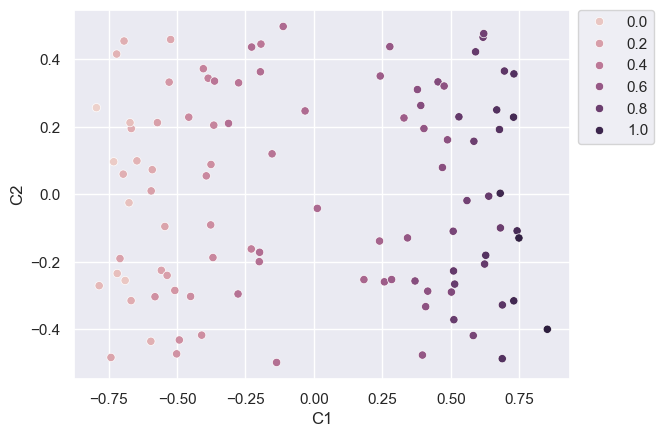

In [379]:
df = pd.DataFrame(data={
    "C1": D_k[:,0],
    "C2": D_k[:,1],
    "Y":  datos["Y"].copy()
})

sns.scatterplot(df, x="C1", y="C2", hue="Y")
plt.legend(bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0) #  
plt.show()

In [386]:
def PCA_paso_a_paso(D, n_componentes=2):
    D_c = D - np.array([np.mean(D, axis=0)]*D.shape[0])
    C = np.cov(D_c, rowvar=False, bias=True)
    eigenvalores, P = np.linalg.eig(C)
    d = eigenvalores.shape[0]

    indices_max = []
    for i in range(n_componentes):
        indices = []
        for i in range(d):
            if i not in indices_max:
                indices.append(i)
            else:
                continue
        indices_max.append(np.argmax(eigenvalores[indices]))
    
    P_k = P[:,indices_max]
    D_k = D_c @ P_k

    return D_k

##### PCA con sci-kit learn

In [343]:
from sklearn.decomposition import PCA

In [344]:
pca = PCA(n_components=2)
pca.fit(D_c)

PCA(n_components=2)

In [345]:
D_new = pca.transform(D_c)
D_new[:5]

array([[-0.72032472,  0.4150514 ],
       [-0.78412715, -0.27042377],
       [-0.79415659,  0.25636967],
       [-0.71821777, -0.23426318],
       [-0.73112212,  0.09639085]])

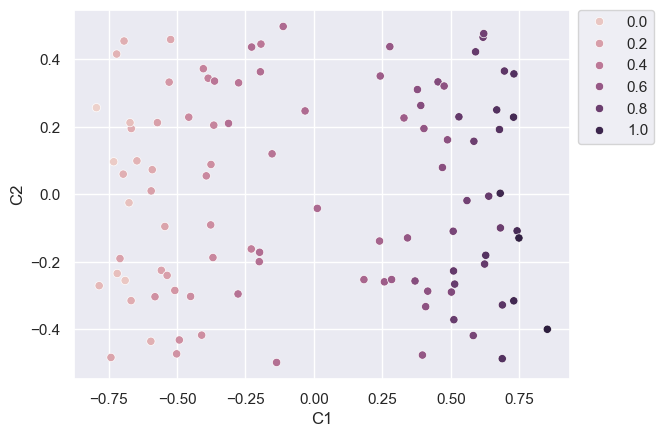

In [378]:
df = pd.DataFrame(data={
    "C1": D_new[:,0],
    "C2": D_new[:,1],
    "Y":  datos["Y"].copy()
})

sns.scatterplot(df, x="C1", y="C2", hue="Y")
plt.legend(bbox_to_anchor=(1.17, 1), loc='upper right', borderaxespad=0) #  
plt.show()

##### Comparación de resultados

In [361]:
eps = 0.000000000000001
np.all(np.abs(D_k - D_new) < eps)

True

##### Ejercicio

In [389]:
D = np.array([
    [4,4],
    [3,3],
    [2,2],
    [1,1],
    [-1,-1],
    [-2,-2],
    [-3,-3],
    [-4,-4],
    [1,-1],
    [-1,1]
])
PCA_paso_a_paso(D, n_componentes=1)

array([[ 5.65685425],
       [ 4.24264069],
       [ 2.82842712],
       [ 1.41421356],
       [-1.41421356],
       [-2.82842712],
       [-4.24264069],
       [-5.65685425],
       [ 0.        ],
       [ 0.        ]])

#### Tablas de contingencia para datos categóricos

